## Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Data Exploration

In [2]:
tweets = pd.read_csv("Donald-Tweets.csv")
tweets.head()

,Date,Time,Tweet_Text
0,16-11-2011,15:26:37,Today we express our deepest gratitude to all ...
1,16-11-2011,13:33:35,Busy day planned in New York. Will soon be mak...
2,16-11-2011,11:14:20,Love the fact that the small groups of protest...
3,16-11-2011,02:19:44,Just had a very open and successful presidenti...
4,16-11-2011,02:10:46,A fantastic day in D.C. Met with President Oba...


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        202 non-null    object
 1   Time        202 non-null    object
 2   Tweet_Text  202 non-null    object
dtypes: object(3)
memory usage: 2.4+ KB


## Cleaning Data
#### Date Assessment

In [4]:
tweets['Date'].value_counts()

16-10-2027    19
16-10-2024    18
16-10-2025    18
16-11-2008    17
16-10-2022    16
16-11-2001    13
16-11-2004    11
16-10-2023    10
16-11-2002    10
16-11-2003     9
16-10-1930     9
16-10-1931     8
16-10-2029     8
16-10-2021     7
16-10-2028     6
16-11-2007     6
16-11-2005     5
16-11-2011     5
16-10-2026     3
16-11-2009     3
16-11-2010     1
Name: Date, dtype: int64

In [5]:
year = []
month = []
date = []

for i in tweets['Date']:
    i = i.split('-')
    yr = '20'+i[0]
    mnth = i[1]
    dte = i[2][2:]
    year.append(yr)
    month.append(mnth)
    date.append(dte)

#### Timeline Assessment

In [6]:
tweets['Time'].nunique()

202

In [7]:
hour = []
for i in range(len(tweets)):
    i = tweets['Time'][i]
    t = i.split(':')
    h = int(t[0])
    hour.append(h)

#### Text Assessment

In [8]:
tweets['Tweet_Text'][:20]

0     Today we express our deepest gratitude to all ...
1     Busy day planned in New York. Will soon be mak...
2     Love the fact that the small groups of protest...
3     Just had a very open and successful presidenti...
4     A fantastic day in D.C. Met with President Oba...
5     Happy 241st birthday to the U.S. Marine Corps!...
6     Such a beautiful and important evening! The fo...
7     Watching the returns at 9:45pm.\n#ElectionNigh...
8     RT @IvankaTrump: Such a surreal moment to vote...
9     RT @EricTrump: Join my family in this incredib...
10    RT @DonaldJTrumpJr: FINAL PUSH! Eric and I doi...
11                            Still time to #VoteTrump!
12    Dont let up, keep getting out to vote - this e...
13    Just out according to @CNN: "Utah officials re...
14    I will be watching the election results from T...
15    We need your vote. Go to the POLLS! Lets conti...
16    VOTE TODAY! Find your polling location. We are...
17                   TODAY WE MAKE AMERICA GREAT

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
clean_tweet = []
init = str.maketrans('','',string.punctuation)
for i in range(len(tweets['Tweet_Text'])):
    txt = tweets['Tweet_Text'][i].translate(init)
    txt1 = txt.replace('https',' ')
    txt1 = txt1.replace('\n',' ')
    clean_tweet.append(txt1.lower())

In [11]:
tweets['Cleaned_tweets']=clean_tweet
tweets['Day'] = date
tweets['Month'] = month
tweets['Year'] = year
tweets['Hour'] = hour
tweets.head()

,Date,Time,Tweet_Text,Cleaned_tweets,Day,Month,Year,Hour
0,16-11-2011,15:26:37,Today we express our deepest gratitude to all ...,today we express our deepest gratitude to all ...,11,11,2016,15
1,16-11-2011,13:33:35,Busy day planned in New York. Will soon be mak...,busy day planned in new york will soon be maki...,11,11,2016,13
2,16-11-2011,11:14:20,Love the fact that the small groups of protest...,love the fact that the small groups of protest...,11,11,2016,11
3,16-11-2011,02:19:44,Just had a very open and successful presidenti...,just had a very open and successful presidenti...,11,11,2016,2
4,16-11-2011,02:10:46,A fantastic day in D.C. Met with President Oba...,a fantastic day in dc met with president obama...,11,11,2016,2


## EDA
### Frequency 

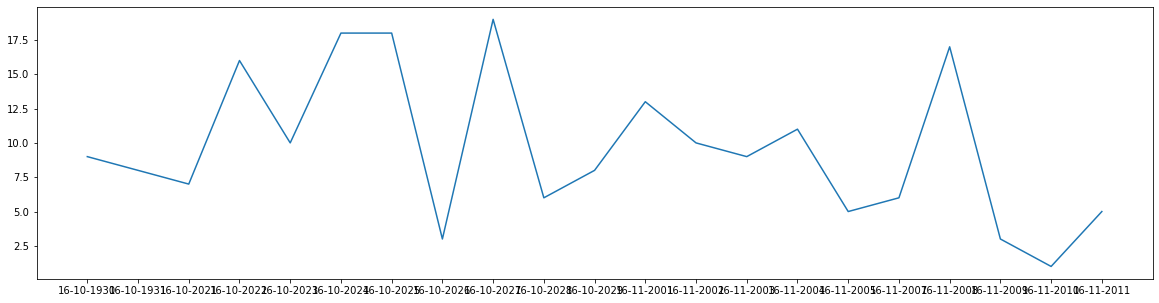

In [13]:
plt.figure(figsize=(20,5))
plt.plot(tweets.groupby("Date")[['Tweet_Text']].count())

In [14]:
tweets.groupby("Month")[['Tweet_Text']].count()

,Tweet_Text
Month,
10,122
11,80


In [15]:
hr_freq = tweets.groupby("Hour")[['Tweet_Text']].count()
tweets['PoD'] = pd.cut(tweets['Hour'], 6, labels = ['Mid-Night','Early Morning','Morning','Afternoon','Evening','Night'])

<AxesSubplot:>

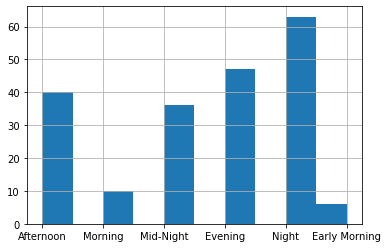

In [16]:
tweets['PoD'].hist()

### Text Usage

In [17]:
#Checking most tagged accounts
matched_pattern = []
for i in range(len(tweets['Tweet_Text'])):
        pattern = re.findall('\S+@\S+',tweets['Tweet_Text'][i])
        if pattern != []:
            matched_pattern.append(pattern)
        else:
            continue

In [18]:
matched_pattern

[['.@IvankaTrump'],
 ['.@CBSNews'],
 ['.@DarrellIssa'],
 ['/@washingtonpost'],
 ['"@slh:'],
 ['"@DeplorableCBTP:'],
 ['"@piersmorgan:'],
 ['"@KeithRowland:'],
 ['"@AZTRUMPTRAIN:'],
 ['"@jensen4law:']]

In [19]:
def finding_text_with_tag(text):
    hashtags = []
    for i in range(len(text)):
        if '#' in text[i]:
            hashtags.append(text[i])
        else:
            continue
    return hashtags


def finding_tag(text,hashtags):
    tags = []
    for i in range(len(hashtags)):
        htag = re.findall('#\S+',hashtags[i])
        try:
            tags.append(htag[0])
            tags.append(htag[1])
        except:
            continue
    return tags

In [20]:
tagged_text = finding_text_with_tag(tweets['Tweet_Text'])
tagsall = finding_tag(tweets['Tweet_Text'], tagged_text)

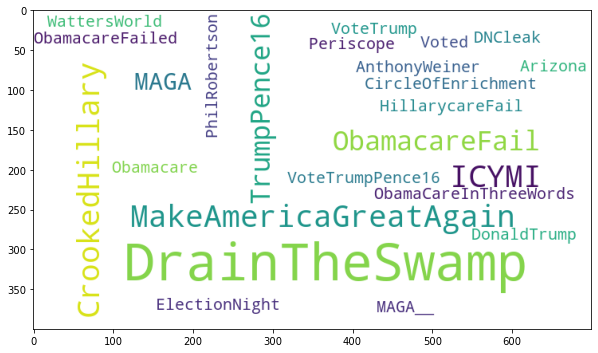

In [21]:
text=(" ").join(tagsall)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(width=700, height=400, background_color='white').generate(text))

In [22]:
tweetson27th = tweets[tweets['Day']=='27'].reset_index()
tweetson27th.head()

,index,Date,Time,Tweet_Text,Cleaned_tweets,Day,Month,Year,Hour,PoD
0,111,16-10-2027,22:37:22,Crooked Hillary launched her political career ...,crooked hillary launched her political career ...,27,10,2016,22,Night
1,112,16-10-2027,22:27:20,"""@KeithRowland: People in Arizona just got a t...",keithrowland people in arizona just got a tast...,27,10,2016,22,Night
2,113,16-10-2027,22:23:56,I will be interviewed on @oreillyfactor tonigh...,i will be interviewed on oreillyfactor tonight...,27,10,2016,22,Night
3,114,16-10-2027,22:05:00,"I delivered a speech in Charlotte, North Carol...",i delivered a speech in charlotte north caroli...,27,10,2016,22,Night
4,115,16-10-2027,21:07:48,"Join me live in Toledo, Ohio. Time to #DrainTh...",join me live in toledo ohio time to drainthesw...,27,10,2016,21,Night


In [23]:
tagged_text27th = finding_text_with_tag(tweetson27th['Tweet_Text'])
tags27th = finding_tag(tweetson27th['Tweet_Text'], tagged_text27th)

In [24]:
tags27th

['#DrainTheSwamp',
 '#DrainTheSwamp',
 '#MAGA!',
 '#ICYMI:',
 '#DrainTheSwamp',
 '#VoteTrumpPence16!',
 '#DrainTheSwamp!',
 '#DrainTheSwamp',
 '#CircleOfEnrichment\u06dd',
 '#DrainTheSwamp?',
 '#ICYMI']

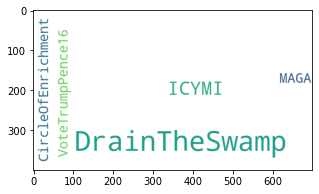

In [25]:
text1=(" ").join(tags27th)
plt.figure(figsize=(5,10))
plt.imshow(WordCloud(width=700, height=400, background_color='white').generate(text1))

## Major Inferences: 
### 1. 2016 November was the Presidential Elections
### 2. October 2016 had-
                          Extensive campaigns & 
                          Presidential Debate hence tweets dishing on Hillary were to be seen.
                          
### 3. Trump mostly spent time on Twitter during the latter half of the day.